In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Read in track metadata with genre labels
tracks = pd.read_csv(r'C:\Users\Dell\Desktop\data\RockOrPop-master\fma-rock-vs-hiphop.csv')

# Read in track metrics with the features
echonest = pd.read_json(r'C:\Users\Dell\Desktop\data\RockOrPop-master\echonest-metrics.json',precise_float = True)

# Merge the relevant columns of tracks and echonest_metrics
echo_tracks = echonest.merge(tracks[['track_id','genre_top']],on = ["track_id"])
echo_tracks.set_index('track_id', inplace=True)
echo_tracks.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
track_id,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [2]:
# there is no missing values
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 2 to 124722
Data columns (total 9 columns):
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
genre_top           4802 non-null object
dtypes: float64(8), object(1)
memory usage: 375.2+ KB


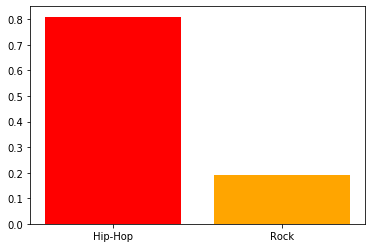

In [3]:
#we can see our sample data is biase
plt.bar(echo_tracks['genre_top'].unique(), echo_tracks['genre_top'].value_counts() / len(echo_tracks), color=['red', 'orange']);

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


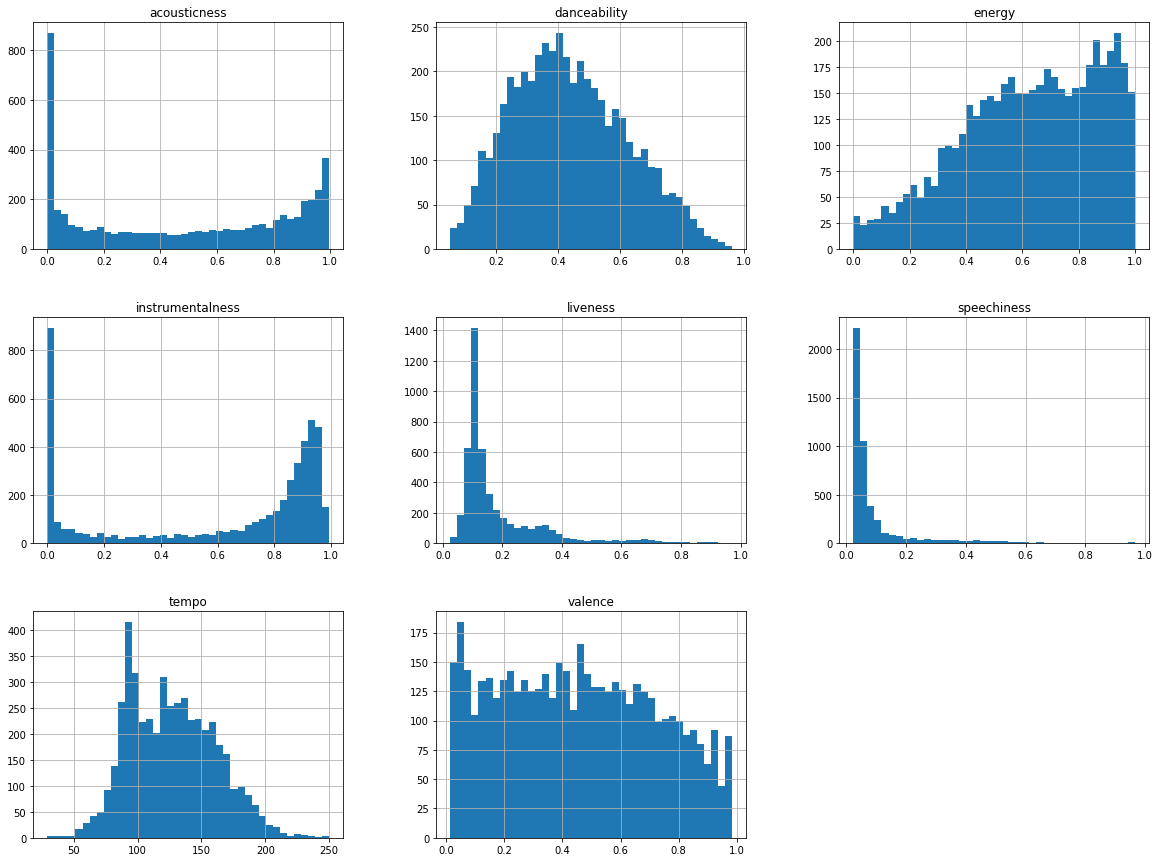

In [4]:
#some of the feat have normal dist with noise
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
echo_tracks.hist(ax = ax, bins=40);

In [5]:
#we can see we don't have missing values
#all feat have good range of min , max only tempo
echo_tracks.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


In [6]:
#now we try code the target columns for using it in corr 
# 0 Hip-Hop , 1 Rock
target = echo_tracks['genre_top']
echo_tracks['genre_top'] = echo_tracks['genre_top'].astype('category').values.codes
echo_tracks.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
track_id,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,0
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,0
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,0
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,0
153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,1


In [7]:
corr = echo_tracks.corr().sort_values('genre_top', ascending=False)
corr['genre_top']


genre_top           1.000000
instrumentalness    0.326037
energy              0.124860
tempo               0.114571
acousticness        0.097748
liveness           -0.007070
valence            -0.246701
danceability       -0.484457
speechiness        -0.496495
Name: genre_top, dtype: float64

In [8]:
# we drop the bad cols and the target col
echo_tracks.drop('liveness',axis=1,inplace=True)
#echo_tracks['genre_top'] = target
echo_tracks.head()

,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,genre_top
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.159310,165.922,0.576661,0
3,0.374408,0.528643,0.817461,0.001851,0.461818,126.957,0.269240,0
5,0.043567,0.745566,0.701470,0.000697,0.124595,100.260,0.621661,0
134,0.452217,0.513238,0.560410,0.019443,0.525519,114.290,0.894072,0
153,0.988306,0.255661,0.979774,0.973006,0.051740,90.241,0.034018,1


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(echo_tracks.drop('genre_top',axis=1), echo_tracks['genre_top'], train_size=0.8, random_state=1)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, train_size=0.8*0.2, random_state=1)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # "Support vector classifier"

def score_dataset(X_train, X_valid, y_train, y_valid, typ, n_est=100, n_ita=100, C=1):
    if typ == 'RandomForestClassifier':
        model = RandomForestClassifier(n_estimators=n_est,max_depth=C,  class_weight={0:0.8, 1:0.2},random_state=0)
    elif typ == 'LogisticRegression':
        model = LogisticRegression(class_weight={0:0.8, 1:0.2},solver='liblinear',C=C, max_iter=n_ita, random_state=0)
    el typ == 'SVC':
        model = SVC(class_weight={0:0.8, 1:0.2},kernel='linear', C=C)
    model.fit(X_train, y_train)
    print(typ)
    preds = model.predict(X_train)
    print('\tMAE for Train: ', mean_absolute_error(y_train, preds), '\tACC Train : ',accuracy_score(y_train, preds))
    preds = model.predict(X_valid)
    print('\tMAE for Test: ', mean_absolute_error(y_valid, preds), '\tACC TEST : ',accuracy_score(y_valid, preds))

SyntaxError: invalid syntax (<ipython-input-24-40fb80875792>, line 12)

In [11]:
#so we are overfitting our data  
for i in range(10):
    score_dataset(X_train, X_valid, Y_train, Y_valid, 'LogisticRegression',n_ita=1000,  C=3*i+0.01)

LogisticRegression
	MAE for Train:  0.15472312703583063 	ACC Train :  0.8452768729641694
	MAE for Test:  0.14409668422683608 	ACC TEST :  0.8559033157731639
LogisticRegression
	MAE for Train:  0.15960912052117263 	ACC Train :  0.8403908794788274
	MAE for Test:  0.15897118066315463 	ACC TEST :  0.8410288193368454
LogisticRegression
	MAE for Train:  0.1498371335504886 	ACC Train :  0.8501628664495114
	MAE for Test:  0.14967462039045554 	ACC TEST :  0.8503253796095445
LogisticRegression
	MAE for Train:  0.1498371335504886 	ACC Train :  0.8501628664495114
	MAE for Test:  0.14874496436318563 	ACC TEST :  0.8512550356368144
LogisticRegression
	MAE for Train:  0.1465798045602606 	ACC Train :  0.8534201954397395
	MAE for Test:  0.1471955376510691 	ACC TEST :  0.8528044623489309
LogisticRegression
	MAE for Train:  0.1482084690553746 	ACC Train :  0.8517915309446255
	MAE for Test:  0.1465757669662225 	ACC TEST :  0.8534242330337775
LogisticRegression
	MAE for Train:  0.1465798045602606 	ACC Trai

In [12]:
for i in range(1,10):
    score_dataset(X_train, X_valid, Y_train, Y_valid, 'RandomForestClassifier',n_est=100*i, C=i)

RandomForestClassifier
	MAE for Train:  0.12866449511400652 	ACC Train :  0.8713355048859935
	MAE for Test:  0.12333436628447475 	ACC TEST :  0.8766656337155253
RandomForestClassifier
	MAE for Train:  0.11237785016286644 	ACC Train :  0.8876221498371335
	MAE for Test:  0.11186860861481251 	ACC TEST :  0.8881313913851875
RandomForestClassifier
	MAE for Train:  0.09609120521172639 	ACC Train :  0.9039087947882736
	MAE for Test:  0.09730399752091726 	ACC TEST :  0.9026960024790828
RandomForestClassifier
	MAE for Train:  0.06677524429967427 	ACC Train :  0.9332247557003257
	MAE for Test:  0.08304927176944531 	ACC TEST :  0.9169507282305547
RandomForestClassifier
	MAE for Train:  0.04560260586319218 	ACC Train :  0.9543973941368078
	MAE for Test:  0.07747133560582585 	ACC TEST :  0.9225286643941741
RandomForestClassifier
	MAE for Train:  0.024429967426710098 	ACC Train :  0.9755700325732899
	MAE for Test:  0.07747133560582585 	ACC TEST :  0.9225286643941741
RandomForestClassifier
	MAE for T

In [13]:
#best model i find with RandomForestClassifier
#it is not over fit or inder fit
score_dataset(X_train, X_valid, Y_train, Y_valid, 'RandomForestClassifier',n_est=1000, C=3)

RandomForestClassifier
	MAE for Train:  0.09283387622149837 	ACC Train :  0.9071661237785016
	MAE for Test:  0.09637434149364735 	ACC TEST :  0.9036256585063527


In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train);

preds = model.predict(X_train)
print('\tMAE for Train: ', mean_absolute_error(Y_train, preds), '\tACC Train : ',accuracy_score(Y_train, preds))

preds = model.predict(X_valid)
print('\tMAE for Train: ', mean_absolute_error(Y_valid, preds), '\tACC Train : ',accuracy_score(Y_valid, preds))

	MAE for Train:  0.1237785016286645 	ACC Train :  0.8762214983713354
	MAE for Train:  0.11279826464208242 	ACC Train :  0.8872017353579176


In [26]:
for i in range(10):
    score_dataset(X_train, X_valid, Y_train, Y_valid, 'SVC', C=i+0.01)

SVC
	MAE for Train:  0.19218241042345277 	ACC Train :  0.8078175895765473
	MAE for Test:  0.18035326929036258 	ACC TEST :  0.8196467307096374
SVC
	MAE for Train:  0.1270358306188925 	ACC Train :  0.8729641693811075
	MAE for Test:  0.11403780601177564 	ACC TEST :  0.8859621939882244
SVC
	MAE for Train:  0.12866449511400652 	ACC Train :  0.8713355048859935
	MAE for Test:  0.11465757669662224 	ACC TEST :  0.8853424233033778
SVC
	MAE for Train:  0.1237785016286645 	ACC Train :  0.8762214983713354
	MAE for Test:  0.1096994112178494 	ACC TEST :  0.8903005887821506
SVC
	MAE for Train:  0.1254071661237785 	ACC Train :  0.8745928338762216
	MAE for Test:  0.10876975519057949 	ACC TEST :  0.8912302448094205
SVC
	MAE for Train:  0.1270358306188925 	ACC Train :  0.8729641693811075
	MAE for Test:  0.10907964053300279 	ACC TEST :  0.8909203594669972
SVC
	MAE for Train:  0.1270358306188925 	ACC Train :  0.8729641693811075
	MAE for Test:  0.10876975519057949 	ACC TEST :  0.8912302448094205
SVC
	MAE for

In [28]:
#i find that best model is RandomForestClassifier cs train and test acc is high and in the same time it is not overfitting
score_dataset(X_train, X_valid, Y_train, Y_valid, 'RandomForestClassifier',n_est=1000, C=3)

RandomForestClassifier
	MAE for Train:  0.09283387622149837 	ACC Train :  0.9071661237785016
	MAE for Test:  0.09637434149364735 	ACC TEST :  0.9036256585063527


In [31]:
model = RandomForestClassifier(n_estimators=1000,max_depth=3,  class_weight={0:0.8, 1:0.2},random_state=0)
model.fit(X_train, Y_train)

preds = model.predict(X_train)
print('\tMAE for Train: ', mean_absolute_error(Y_train, preds), '\tACC Train : ',accuracy_score(Y_train, preds))

preds = model.predict(X_valid)
print('\tMAE for valid: ', mean_absolute_error(Y_valid, preds), '\tACC valid : ',accuracy_score(Y_valid, preds))

	MAE for Train:  0.09283387622149837 	ACC Train :  0.9071661237785016
	MAE for valid:  0.09637434149364735 	ACC valid :  0.9036256585063527


In [32]:
#and we find that for test set the acc is high and this is rare
# and that mean our model is good and is genirale 
#and the same for MAE

preds = model.predict(X_test)
print('\tMAE for test: ', mean_absolute_error(Y_test, preds), '\tACC test : ',accuracy_score(Y_test, preds))

	MAE for test:  0.08532778355879292 	ACC test :  0.9146722164412071


In [35]:
from sklearn.metrics import classification_report

#cs we have biased data we see class 0 have little low recall and precision but in other hand
#for this 0.8 , 0.2 biase data so it is acculay good
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.86      0.81       210
           1       0.96      0.93      0.94       751

    accuracy                           0.91       961
   macro avg       0.87      0.89      0.88       961
weighted avg       0.92      0.91      0.92       961

